<a href="https://colab.research.google.com/github/NeSma237/Smart_project_KNN/blob/main/Plant_disease_classification(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Disease Classification using K-Nearest Neighbors (KNN)

This notebook implements a KNN-based classifier to detect plant diseases from leaf images.
We use the "PlantVillage" dataset, and follow a full pipeline including:

- Dataset loading and preprocessing
- Image flattening and normalization
- Training a KNN classifier
- Evaluating model performance


In [ ]:
# Step 1: Install required packages
!pip install kagglehub
!pip install opencv-python
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

## Step 1: Download the dataset from KaggleHub
We use the "emmarex/plantdisease" dataset hosted on Kaggle.


In [39]:
import kagglehub


path = kagglehub.dataset_download("emmarex/plantdisease")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/plantdisease


## Step 2: Inspect the dataset structure
Check the available folders to identify where the actual image data is stored.


In [40]:
import os

# Step 3: Inspect the dataset structure
print(os.listdir(path))


['PlantVillage', 'plantvillage']


In [55]:
# Step 4: Load and preprocess images
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

IMG_SIZE = 64
data = []
labels = []

# نستخدم المجلد الأساسي
dataset_path = os.path.join(path, "PlantVillage")

# استعراض المجلدات داخله (كل مجلد = نوع مرض)
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if not os.path.isdir(category_path):
        continue
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(category)
        except:
            pass

# تحويلهم إلى NumPy Arrays
X = np.array(data)
y = np.array(labels)

print("عدد الصور:", len(X))
print("عدد الفئات:", len(set(y)))


عدد الصور: 20638
عدد الفئات: 15


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Prepare the data
X = X.reshape(len(X), -1)  # بدون /255.0 لو هنستخدم StandardScaler
le = LabelEncoder()
y = le.fit_transform(y)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: KNN training
knn = KNeighborsClassifier(n_neighbors=12, metric='cosine')
knn.fit(X_train_pca, y_train)

# Step 6: Evaluation
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy بعد Standardization + PCA: {accuracy:.4f}")


Accuracy بعد Standardization + PCA: 0.6812


Accuracy: 0.6812015503875969
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.66      0.47      0.55       179
                     Pepper__bell___healthy       0.67      0.76      0.71       306
                      Potato___Early_blight       0.73      0.94      0.82       197
                       Potato___Late_blight       0.59      0.48      0.53       222
                           Potato___healthy       0.80      0.14      0.24        29
                      Tomato_Bacterial_spot       0.56      0.85      0.67       417
                        Tomato_Early_blight       0.51      0.18      0.27       193
                         Tomato_Late_blight       0.71      0.55      0.62       387
                           Tomato_Leaf_Mold       0.64      0.74      0.69       160
                  Tomato_Septoria_leaf_spot       0.63      0.50      0.56       370
Tomato_Spider_mites_Two_spotted_spi

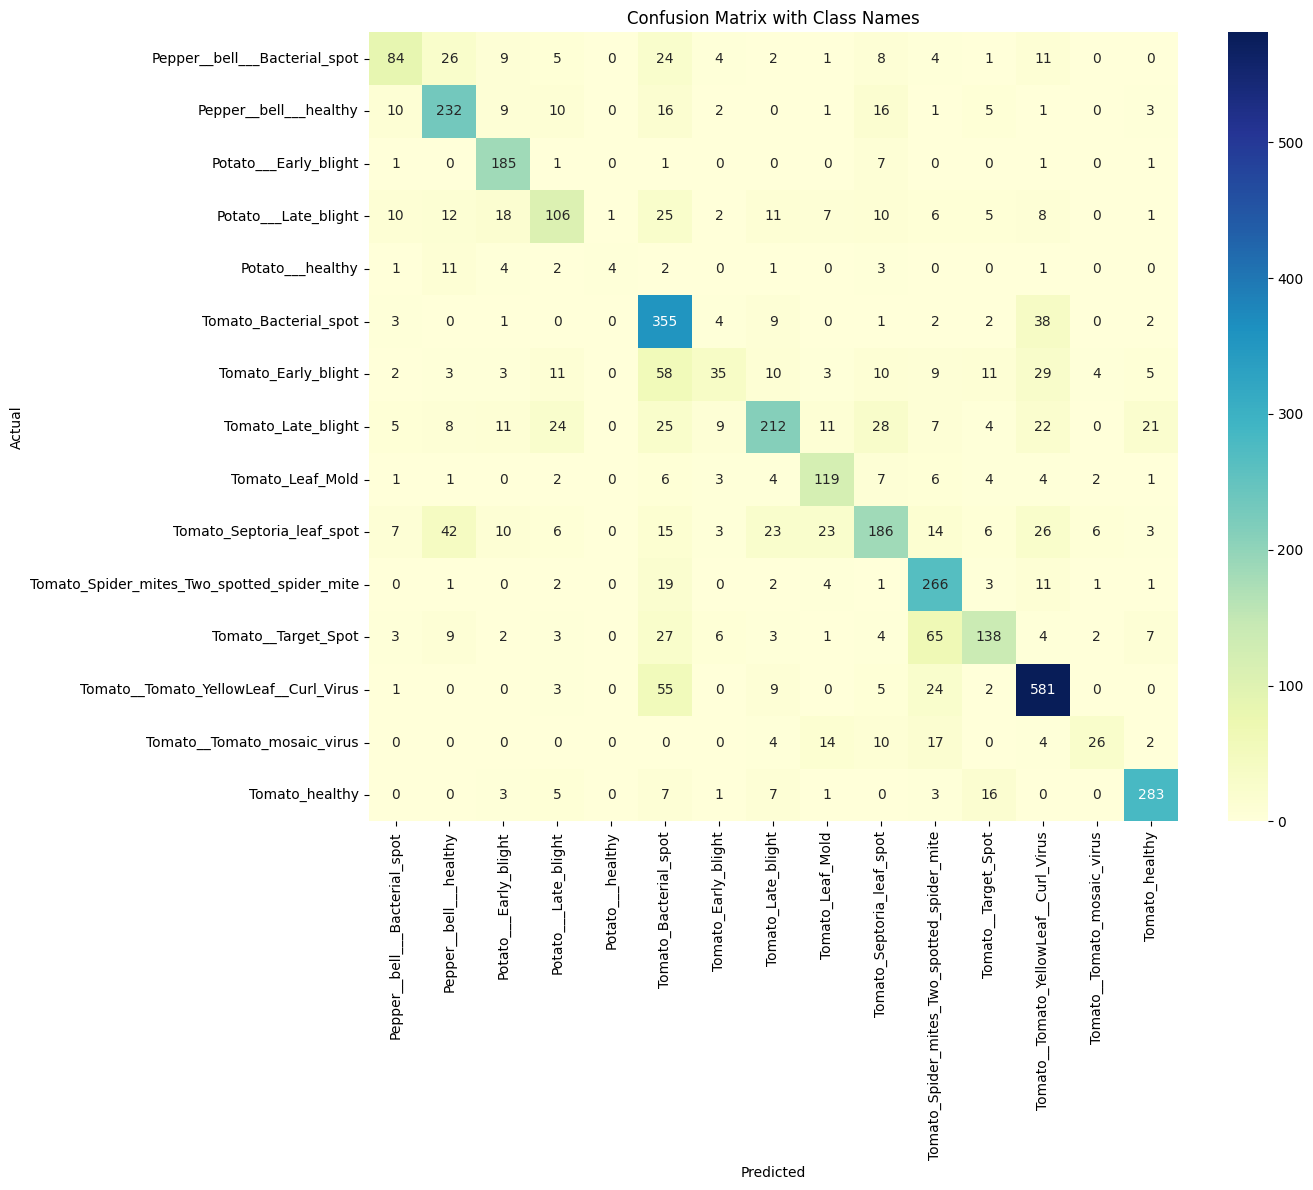

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# توقع القيم
y_pred = knn.predict(X_test_pca)

# Step 4: Convert back to original class names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Step 5: Evaluation with class names
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))  # هنا أسماء الأمراض هتظهر

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Class Names")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
# اختبر على 1000 صورة فقط مثلاً
X_small = X_train_pca[:1000]
y_small = y_train[:1000]


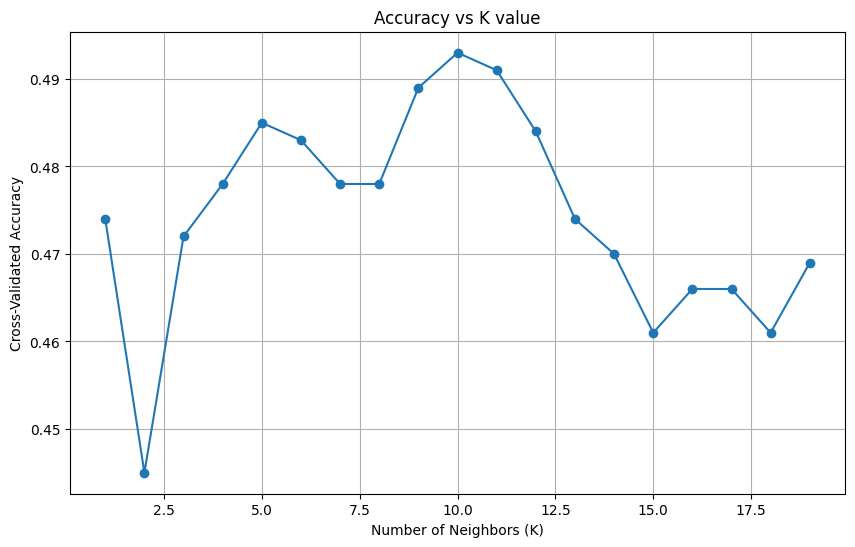

أفضل قيمة لـ K هي: 10 بدقة: 0.4930


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = list(range(1, 20))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_small, y_small, cv=5)
    accuracies.append(scores.mean())

# عرض النتائج
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# أفضل K
best_k = k_values[accuracies.index(max(accuracies))]
print(f"أفضل قيمة لـ K هي: {best_k} بدقة: {max(accuracies):.4f}")


In [58]:
# Step 8: Predict on a new image (Optional)
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_flat = img.reshape(1, -1)
    img_scaled = scaler.transform(img_flat)  # نفس StandardScaler اللي دربتيه
    img_pca = pca.transform(img_scaled)      # نفس PCA اللي دربتيه
    pred = knn.predict(img_pca)
    return le.inverse_transform(pred)[0]

#Example usage:
print(predict_image("/content/Tomato_Early_blight.jpeg"))



Tomato_Early_blight
